### Research Question: 
What car and model are most popular and in which county in Washington State are people paying the most for that car.

In [129]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
ev = pd.read_csv('EV_Data.csv')
ev

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


Display all missing values in the dataframe

In [130]:
ev.isna().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

Here I decided some columns were missing the majority of my data, and since they weren't necessary, I dropped them

In [131]:
ev= ev.drop('Legislative District', axis=1)
ev

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [132]:
ev= ev.drop('2020 Census Tract', axis=1)
ev

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [133]:
ev= ev.drop('Vehicle Location', axis=1)
ev

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,125701579,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,244285107,PUGET SOUND ENERGY INC
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,156773144,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,165103011,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,205138552,PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,195224452,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,228454180,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,168797219,PUD NO 2 OF GRANT COUNTY
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,182448801,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


County (and the rest of these columns) was important to answering my question, so I dropped all the rows where it was missing the information

In [134]:
ev[ev['County'].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
149245,5YJSA1E21J,NaN,NaN,AE,NaN,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,220643132,NaN
154553,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,475254825,NaN
159157,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,143609049,NaN
167298,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,159850029,NaN
170413,1N4AZ0CP1D,NaN,NaN,AP,NaN,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,112277063,NaN


In [135]:
ev[ev['City'].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
149245,5YJSA1E21J,NaN,NaN,AE,NaN,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,220643132,NaN
154553,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,475254825,NaN
159157,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,143609049,NaN
167298,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,159850029,NaN
170413,1N4AZ0CP1D,NaN,NaN,AP,NaN,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,112277063,NaN


In [136]:
ev[ev['Postal Code'].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
149245,5YJSA1E21J,NaN,NaN,AE,NaN,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,220643132,NaN
154553,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,475254825,NaN
159157,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,143609049,NaN
167298,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,159850029,NaN
170413,1N4AZ0CP1D,NaN,NaN,AP,NaN,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,112277063,NaN


In [137]:
ev[ev['Electric Utility'].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
149245,5YJSA1E21J,NaN,NaN,AE,NaN,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,220643132,NaN
154553,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,475254825,NaN
159157,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,143609049,NaN
167298,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,159850029,NaN
170413,1N4AZ0CP1D,NaN,NaN,AP,NaN,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,112277063,NaN


Here is where I dropped the rows

In [138]:
ev=ev.drop(149245)
ev=ev.drop(154553)
ev=ev.drop(159157)
ev=ev.drop(167298)
ev=ev.drop(170413)

I double checked for spelling errors in the most likely columns

In [139]:
ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    91950
Clean Alternative Fuel Vehicle Eligible                         66326
Not eligible due to low battery range                           19585
Name: count, dtype: int64

In [140]:
ev['Make'].value_counts()

Make
TESLA                   79655
NISSAN                  13997
CHEVROLET               13678
FORD                     9199
BMW                      7570
KIA                      7432
TOYOTA                   6288
VOLKSWAGEN               5004
JEEP                     4480
HYUNDAI                  4406
RIVIAN                   4312
VOLVO                    4133
AUDI                     3646
CHRYSLER                 2993
MERCEDES-BENZ            1589
PORSCHE                  1139
MITSUBISHI                958
MINI                      898
POLESTAR                  882
HONDA                     833
SUBARU                    831
FIAT                      784
DODGE                     568
MAZDA                     476
CADILLAC                  382
LEXUS                     370
SMART                     270
LINCOLN                   267
LUCID                     240
JAGUAR                    232
GENESIS                   182
LAND ROVER                 56
FISKER                     49
ALFA 

In [141]:
ev['Model'].value_counts()

Model
MODEL Y        35989
MODEL 3        30091
LEAF           13365
MODEL S         7734
BOLT EV         6821
               ...  
745LE              2
918                1
S-10 PICKUP        1
SPECTRE            1
BENTAYGA           1
Name: count, Length: 139, dtype: int64

Here I checked to see if the strings, floats, and objects were appropiate for their category, which they were

In [142]:
ev.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
DOL Vehicle ID                                         int64
Electric Utility                                      object
dtype: object

Here I checked for duplicates which there were none

In [143]:
ev[ev.duplicated()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility


Once I had cleaned my data, I started on my analysis. First thing I did was have my data described

In [144]:
ev.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,DOL Vehicle ID
count,177861.000000,177861.000000,177861.000000,177861.000000,1.778610e+05
mean,98172.453506,2020.515667,58.838396,1072.583197,2.202312e+08
std,2442.450668,2.989206,91.979281,8355.518364,7.584774e+07
min,1545.000000,1997.000000,0.000000,0.000000,4.385000e+03
25%,98052.000000,2019.000000,0.000000,0.000000,1.814762e+08
50%,98122.000000,2022.000000,0.000000,0.000000,2.282526e+08
75%,98370.000000,2023.000000,75.000000,0.000000,2.548448e+08
max,99577.000000,2024.000000,337.000000,845000.000000,4.792548e+08


This table I found more useful because it shows more info like the most popular make, and the most represented county. From this table we know that most of the data was taken from King county in Washington state. The Tesla Model Y is the most common electric vehicle from this dataset with an unknown CAFV Eligibility. 

In [145]:
ev.describe(include=object)

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility
count,177861,177861,177861,177861,177861,177861,177861,177861,177861
unique,10829,196,723,43,40,139,2,3,76
top,7SAYGDEE6P,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,1239,92740,29447,177477,79655,35989,139205,91950,65990


In [147]:
import matplotlib.pyplot as plt

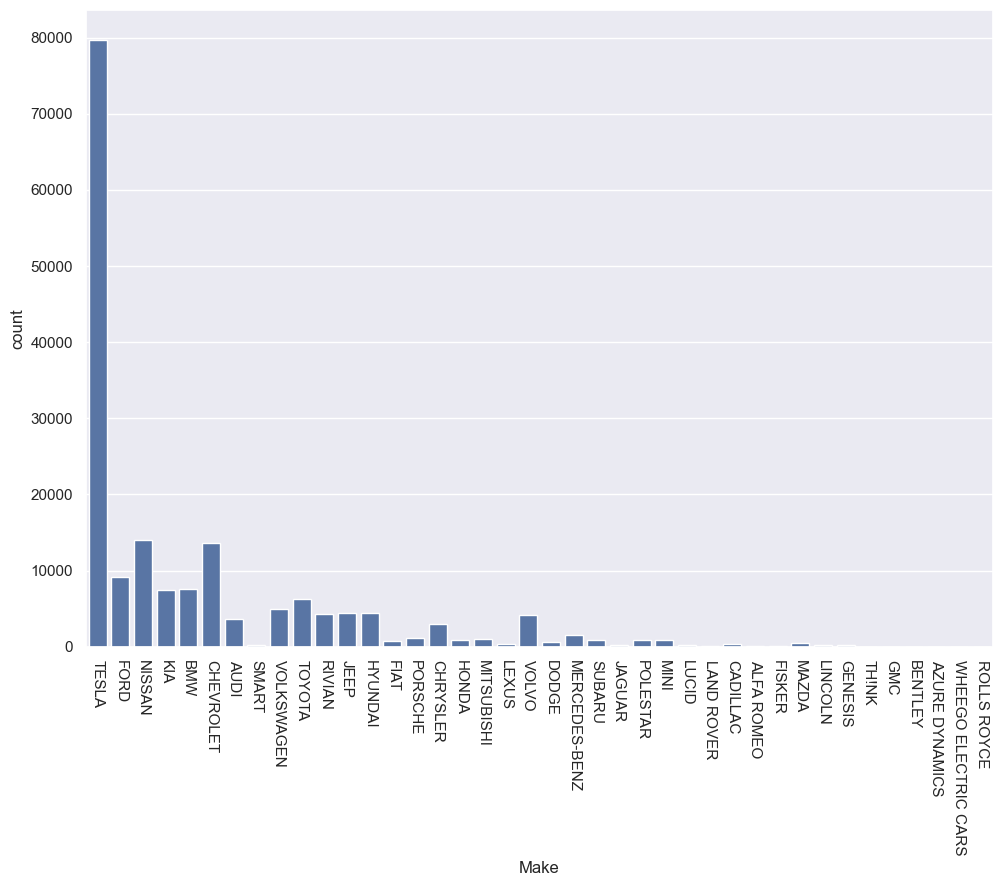

In [148]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=ev, x='Make')
plt.xticks(rotation=270)
plt.show()

This is a bar graph I made of the most represented/ popular ev car brand. In this case it was Tesla by a high lead. 

In [149]:
nozeros = ev
nozeros

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,125701579,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,244285107,PUGET SOUND ENERGY INC
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,156773144,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,165103011,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,205138552,PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,195224452,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,228454180,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,168797219,PUD NO 2 OF GRANT COUNTY
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,182448801,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [150]:
nozeros = ev
nozeros.replace(0, pd.NA, inplace=True)
nozeros.dropna(inplace=True)

nozeros

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
30,KNDJX3AE9H,Thurston,Olympia,WA,98502.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,140569600,PUGET SOUND ENERGY INC
71,KNDJX3AE5G,Snohomish,Edmonds,WA,98020.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,158961099,PUGET SOUND ENERGY INC
187,5YJSA1DN6D,Yakima,Yakima,WA,98903.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,156737612,PACIFICORP
218,5YJSA1CG6D,Kitsap,Port Orchard,WA,98367.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,124244284,PUGET SOUND ENERGY INC
293,WBA8E1C52H,King,Tukwila,WA,98168.0,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,44100,139331412,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177581,KNDJP3AE2G,King,Vashon,WA,98070.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,146484964,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177591,KNDJX3AE3H,Whatcom,Bellingham,WA,98225.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,251839507,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
177605,5YJSA1DP4D,Pierce,Gig Harbor,WA,98335.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,231046714,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177723,LYVBR0DK8K,King,Renton,WA,98055.0,2019,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,289237567,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


Here I wanted to find out which county spent (on average) the most amount for an EV model. I ran into an issue here where a chunk of my data had listed the base MSRP price as $0, so I had to create a second dataset called nozeros to temperarily remove those rows to get a more accurate read on my data. Based on the list here, it seems like the citizens in Charles County spend the most money on EV's. 

In [192]:
nozeros.groupby('County')['Base MSRP'].mean().to_frame().sort_values(by='Base MSRP', ascending=False)

,Base MSRP
County,
Charles,102000.0
Multnomah,90700.0
Spotsylvania,75095.0
Klickitat,71100.0
Albemarle,69900.0
Riverside,69900.0
Collin,69900.0
Columbia,69900.0
Cowlitz,63752.8125


Here is a more visual representation of which county spends the most amount of money on an EV. 

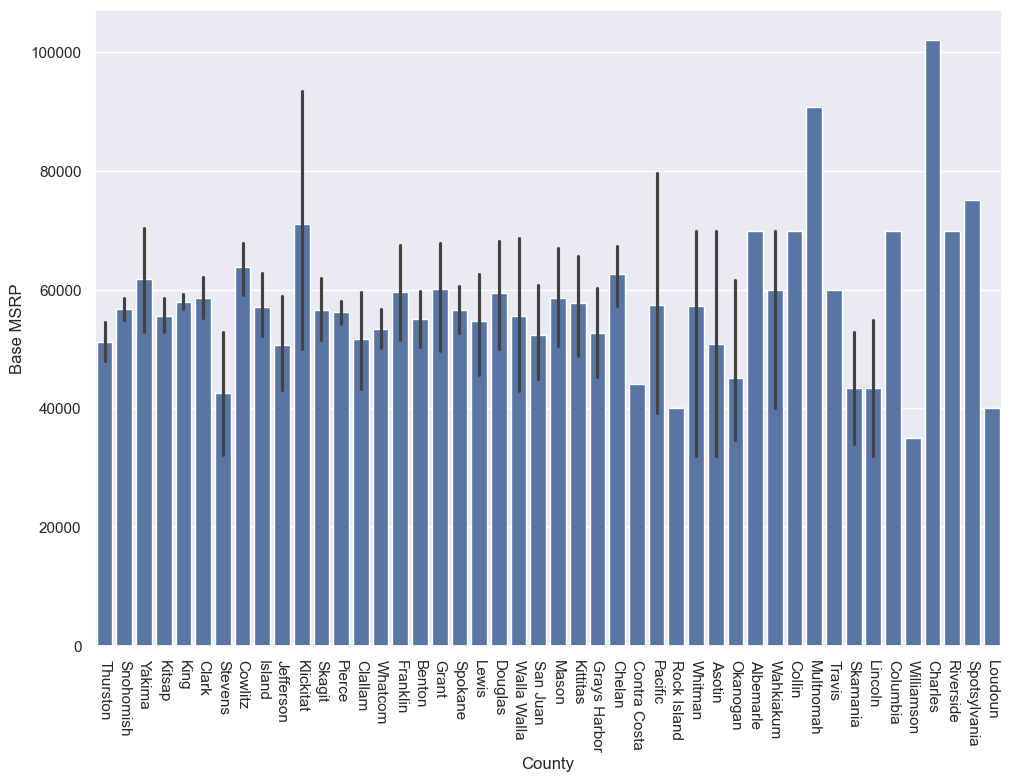

In [152]:
sns.barplot(data=nozeros, y='Base MSRP', x= 'County')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=270)
plt.show()

So at first I thought Charles County in Maryland are where people are paying the most for an electric vehicle. Then when I pulled up the customers in this county, it was only one who payed over $100k on the car, making the average price in this county so high. 

In [200]:
ev[ev['County'] == 'Charles']

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
160314,YH4K14AA6C,Charles,Hughesville,MD,20637.0,2012,FISKER,KARMA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,102000,131146571,NON WASHINGTON STATE ELECTRIC UTILITY


In [205]:
ev[ev['County'] == 'Multnomah']

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
139029,WBA7J2C52J,Multnomah,Portland,OR,97214.0,2018,BMW,740E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,90700,170860924,NON WASHINGTON STATE ELECTRIC UTILITY


In [209]:
ev['State'].value_counts()

State
WA    3331
VA       3
TX       3
CA       2
IL       1
OR       1
MD       1
NV       1
Name: count, dtype: int64

In [221]:
onlywa = nozeros
onlywa.replace('VA', pd.NA, inplace=True)
onlywa.dropna(inplace=True)

onlywa

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
30,KNDJX3AE9H,Thurston,Olympia,WA,98502.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,140569600,PUGET SOUND ENERGY INC
71,KNDJX3AE5G,Snohomish,Edmonds,WA,98020.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,158961099,PUGET SOUND ENERGY INC
187,5YJSA1DN6D,Yakima,Yakima,WA,98903.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,156737612,PACIFICORP
218,5YJSA1CG6D,Kitsap,Port Orchard,WA,98367.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,124244284,PUGET SOUND ENERGY INC
293,WBA8E1C52H,King,Tukwila,WA,98168.0,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,44100,139331412,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177581,KNDJP3AE2G,King,Vashon,WA,98070.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,146484964,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177591,KNDJX3AE3H,Whatcom,Bellingham,WA,98225.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,251839507,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
177605,5YJSA1DP4D,Pierce,Gig Harbor,WA,98335.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,231046714,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177723,LYVBR0DK8K,King,Renton,WA,98055.0,2019,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,289237567,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
30,KNDJX3AE9H,Thurston,Olympia,WA,98502.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,140569600,PUGET SOUND ENERGY INC
71,KNDJX3AE5G,Snohomish,Edmonds,WA,98020.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,158961099,PUGET SOUND ENERGY INC
187,5YJSA1DN6D,Yakima,Yakima,WA,98903.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,156737612,PACIFICORP
218,5YJSA1CG6D,Kitsap,Port Orchard,WA,98367.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,124244284,PUGET SOUND ENERGY INC
293,WBA8E1C52H,King,Tukwila,WA,98168.0,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,44100,139331412,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177581,KNDJP3AE2G,King,Vashon,WA,98070.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,146484964,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177591,KNDJX3AE3H,Whatcom,Bellingham,WA,98225.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,251839507,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
177605,5YJSA1DP4D,Pierce,Gig Harbor,WA,98335.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,231046714,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177723,LYVBR0DK8K,King,Renton,WA,98055.0,2019,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,289237567,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [223]:
onlywa = nozeros
onlywa.replace('TX', pd.NA, inplace=True)
onlywa.dropna(inplace=True)

onlywa

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
30,KNDJX3AE9H,Thurston,Olympia,WA,98502.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,140569600,PUGET SOUND ENERGY INC
71,KNDJX3AE5G,Snohomish,Edmonds,WA,98020.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,158961099,PUGET SOUND ENERGY INC
187,5YJSA1DN6D,Yakima,Yakima,WA,98903.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,156737612,PACIFICORP
218,5YJSA1CG6D,Kitsap,Port Orchard,WA,98367.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,124244284,PUGET SOUND ENERGY INC
293,WBA8E1C52H,King,Tukwila,WA,98168.0,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,44100,139331412,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177581,KNDJP3AE2G,King,Vashon,WA,98070.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,146484964,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177591,KNDJX3AE3H,Whatcom,Bellingham,WA,98225.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,251839507,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
177605,5YJSA1DP4D,Pierce,Gig Harbor,WA,98335.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,231046714,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177723,LYVBR0DK8K,King,Renton,WA,98055.0,2019,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,289237567,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [239]:
onlywa = nozeros
onlywa.replace('CA', pd.NA, inplace=True)
onlywa.dropna(inplace=True)

onlywa

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
30,KNDJX3AE9H,Thurston,Olympia,WA,98502.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,140569600,PUGET SOUND ENERGY INC
71,KNDJX3AE5G,Snohomish,Edmonds,WA,98020.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,158961099,PUGET SOUND ENERGY INC
187,5YJSA1DN6D,Yakima,Yakima,WA,98903.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,156737612,PACIFICORP
218,5YJSA1CG6D,Kitsap,Port Orchard,WA,98367.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,124244284,PUGET SOUND ENERGY INC
293,WBA8E1C52H,King,Tukwila,WA,98168.0,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,44100,139331412,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177581,KNDJP3AE2G,King,Vashon,WA,98070.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,146484964,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177591,KNDJX3AE3H,Whatcom,Bellingham,WA,98225.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,251839507,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
177605,5YJSA1DP4D,Pierce,Gig Harbor,WA,98335.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,231046714,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177723,LYVBR0DK8K,King,Renton,WA,98055.0,2019,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,289237567,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [227]:
onlywa = nozeros
onlywa.replace('IL', pd.NA, inplace=True)
onlywa.dropna(inplace=True)

onlywa

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
30,KNDJX3AE9H,Thurston,Olympia,WA,98502.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,140569600,PUGET SOUND ENERGY INC
71,KNDJX3AE5G,Snohomish,Edmonds,WA,98020.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,158961099,PUGET SOUND ENERGY INC
187,5YJSA1DN6D,Yakima,Yakima,WA,98903.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,156737612,PACIFICORP
218,5YJSA1CG6D,Kitsap,Port Orchard,WA,98367.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,124244284,PUGET SOUND ENERGY INC
293,WBA8E1C52H,King,Tukwila,WA,98168.0,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,44100,139331412,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177581,KNDJP3AE2G,King,Vashon,WA,98070.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,146484964,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177591,KNDJX3AE3H,Whatcom,Bellingham,WA,98225.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,251839507,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
177605,5YJSA1DP4D,Pierce,Gig Harbor,WA,98335.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,231046714,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177723,LYVBR0DK8K,King,Renton,WA,98055.0,2019,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,289237567,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [229]:
onlywa = nozeros
onlywa.replace('OR', pd.NA, inplace=True)
onlywa.dropna(inplace=True)

onlywa

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
30,KNDJX3AE9H,Thurston,Olympia,WA,98502.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,140569600,PUGET SOUND ENERGY INC
71,KNDJX3AE5G,Snohomish,Edmonds,WA,98020.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,158961099,PUGET SOUND ENERGY INC
187,5YJSA1DN6D,Yakima,Yakima,WA,98903.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,156737612,PACIFICORP
218,5YJSA1CG6D,Kitsap,Port Orchard,WA,98367.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,124244284,PUGET SOUND ENERGY INC
293,WBA8E1C52H,King,Tukwila,WA,98168.0,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,44100,139331412,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177581,KNDJP3AE2G,King,Vashon,WA,98070.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,146484964,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177591,KNDJX3AE3H,Whatcom,Bellingham,WA,98225.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,251839507,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
177605,5YJSA1DP4D,Pierce,Gig Harbor,WA,98335.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,231046714,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177723,LYVBR0DK8K,King,Renton,WA,98055.0,2019,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,289237567,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [231]:
onlywa = nozeros
onlywa.replace('MD', pd.NA, inplace=True)
onlywa.dropna(inplace=True)

onlywa

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
30,KNDJX3AE9H,Thurston,Olympia,WA,98502.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,140569600,PUGET SOUND ENERGY INC
71,KNDJX3AE5G,Snohomish,Edmonds,WA,98020.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,158961099,PUGET SOUND ENERGY INC
187,5YJSA1DN6D,Yakima,Yakima,WA,98903.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,156737612,PACIFICORP
218,5YJSA1CG6D,Kitsap,Port Orchard,WA,98367.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,124244284,PUGET SOUND ENERGY INC
293,WBA8E1C52H,King,Tukwila,WA,98168.0,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,44100,139331412,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177581,KNDJP3AE2G,King,Vashon,WA,98070.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,146484964,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177591,KNDJX3AE3H,Whatcom,Bellingham,WA,98225.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,251839507,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
177605,5YJSA1DP4D,Pierce,Gig Harbor,WA,98335.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,231046714,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177723,LYVBR0DK8K,King,Renton,WA,98055.0,2019,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,289237567,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [233]:
onlywa = nozeros
onlywa.replace('NV', pd.NA, inplace=True)
onlywa.dropna(inplace=True)

onlywa

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
30,KNDJX3AE9H,Thurston,Olympia,WA,98502.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,140569600,PUGET SOUND ENERGY INC
71,KNDJX3AE5G,Snohomish,Edmonds,WA,98020.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,158961099,PUGET SOUND ENERGY INC
187,5YJSA1DN6D,Yakima,Yakima,WA,98903.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,156737612,PACIFICORP
218,5YJSA1CG6D,Kitsap,Port Orchard,WA,98367.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,124244284,PUGET SOUND ENERGY INC
293,WBA8E1C52H,King,Tukwila,WA,98168.0,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,44100,139331412,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177581,KNDJP3AE2G,King,Vashon,WA,98070.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,146484964,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177591,KNDJX3AE3H,Whatcom,Bellingham,WA,98225.0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,251839507,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
177605,5YJSA1DP4D,Pierce,Gig Harbor,WA,98335.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,231046714,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177723,LYVBR0DK8K,King,Renton,WA,98055.0,2019,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,289237567,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [241]:
onlywa.groupby('County')['Base MSRP'].mean().to_frame().sort_values(by='Base MSRP', ascending=False)

,Base MSRP
County,
Klickitat,71100.000000
Columbia,69900.000000
Cowlitz,63752.812500
Chelan,62611.136364
Yakima,61746.250000
Grant,60056.250000
Wahkiakum,59931.666667
Franklin,59522.307692
Douglas,59471.363636


In [243]:
onlywa[onlywa['County'] == 'Klickitat']

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,DOL Vehicle ID,Electric Utility
37611,5YJSA1CP0D,Klickitat,White Salmon,WA,98672.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,5086070,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF K...
71913,5YJSA1H17E,Klickitat,White Salmon,WA,98672.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,108856478,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF K...
99679,5YJRE1A18B,Klickitat,Lyle,WA,98635.0,2011,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,245,109000,243155510,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF K...
143104,5YJSA1AG4D,Klickitat,Bingen,WA,98605.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,183219767,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF K...
158683,WMZYU7C47J,Klickitat,Goldendale,WA,98620.0,2018,MINI,COUNTRYMAN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,12,36800,256125404,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF K...


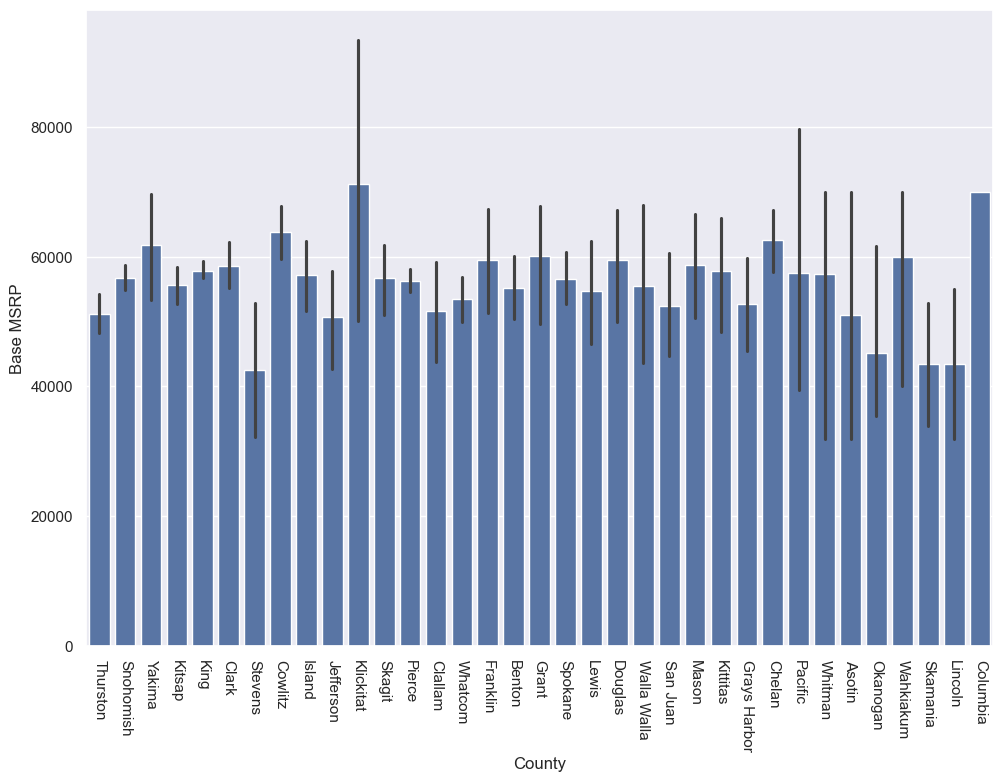

In [245]:
sns.barplot(data=onlywa, y='Base MSRP', x= 'County')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=270)
plt.show()

In [254]:
onlywa['Model'].value_counts()

Model
MODEL S       1493
SOUL           381
530E           285
XC60           222
SOUL EV        212
330E           183
COUNTRYMAN     159
PACIFICA       111
XC90            81
CROSSTREK       65
ROADSTER        46
740E            31
CAYENNE         23
CT6             13
KARMA           12
PANAMERA        10
WHEEGO           3
918              1
Name: count, dtype: int64

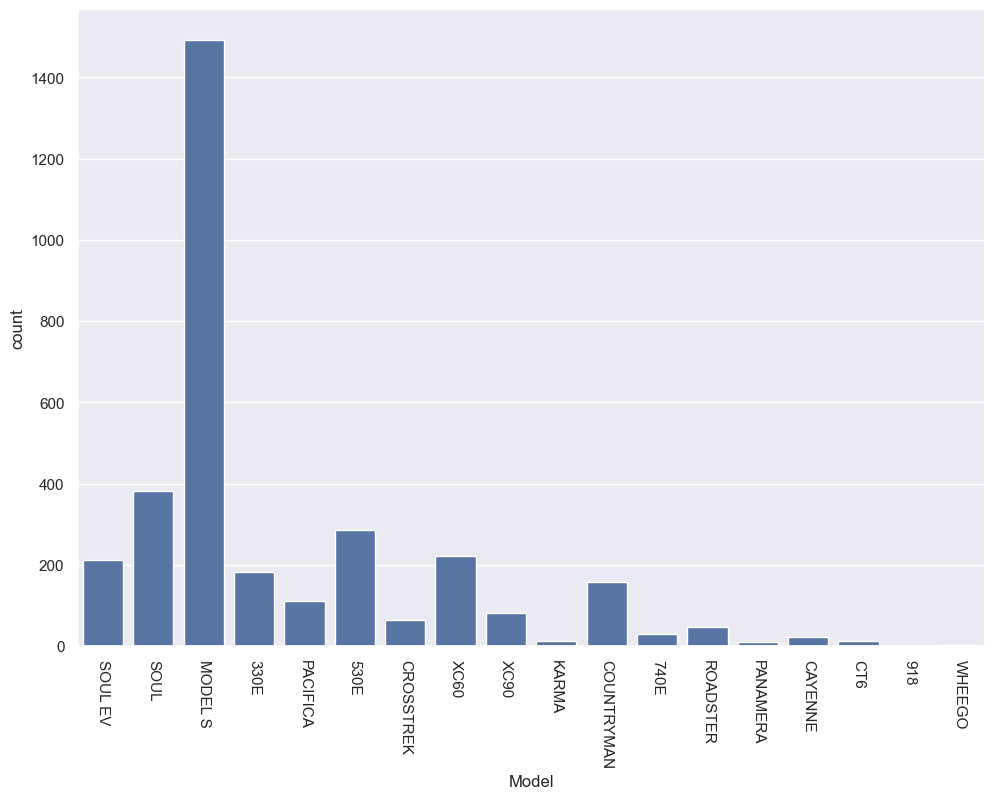

In [261]:
sns.countplot(data=onlywa, x='Model')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=270)
plt.show()

This chart shows the most popular EV brand in the State of Washington.

In [297]:
model_s = onlywa[onlywa['Model'] == 'MODEL S']
model_s.groupby(['Model', 'County'])['Base MSRP'].mean().to_frame()

Base MSRP
Model   County                    
MODEL S Asotin        69900.000000
        Benton        69311.764706
        Chelan        69900.000000
        Clallam       69900.000000
        Clark         69215.068493
        Columbia      69900.000000
        Cowlitz       68233.333333
        Douglas       68650.000000
        Franklin      69900.000000
        Grant         69900.000000
        Grays Harbor  69900.000000
        Island        68788.888889
        Jefferson     68233.333333
        King          69018.773946
        Kitsap        69718.181818
        Kittitas      69900.000000
        Klickitat     69900.000000
        Lewis         66566.666667
        Mason         69900.000000
        Okanogan      69900.000000
        Pacific       69900.000000
        Pierce        69040.625000
        San Juan      69900.000000
        Skagit        67900.000000
        Snohomish     68990.909091
        Spokane       67831.034483
        Thurston      68847.368421
        Wahkiakum     69900.000000
        Walla Walla   69900.000000
        Whatcom       69682.608696
        Whitman       69900.000000
        Yakima        68788.888889

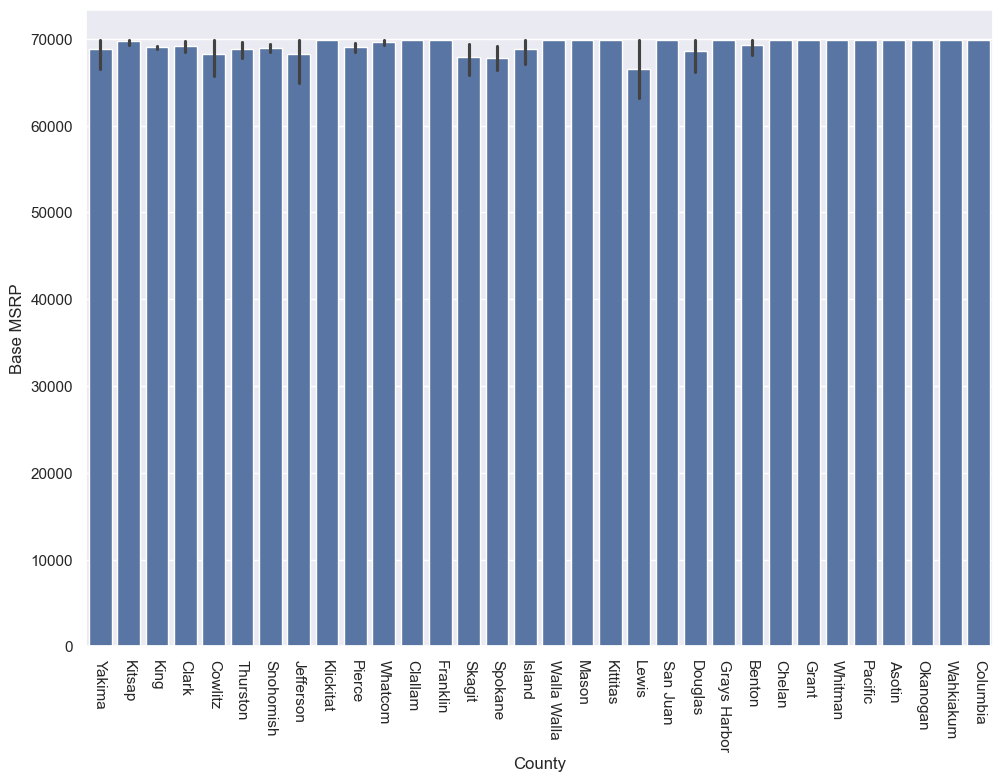

In [313]:
sns.barplot(data=model_s, x='County', y='Base MSRP')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=270)
plt.show()

In [323]:
model_s = onlywa[onlywa['Model'] == 'MODEL S']
model_s.groupby(['Model', 'County'])['Base MSRP'].mean().to_frame().mean()

Base MSRP    69288.04518
dtype: float64

Here in this chart we can see that people are paying just around the same price for the Tesla Model S for a cap of $70,000. 

### Conclusion

In this exploratory data analysis, my research question was: What electric car and model are most popular, and in which county in Washington State are people paying the most for that electric car? 

Assuming this data is credible because it does not have an author or creditor, we would find that the Tesla Model S was the most popular electric car in Washington State, with 1,493 cars in the State. I had to create a new dataset with some cleaned variables to find this information.  

After cleaning my data even more and creating more versions of the dataset, I found that counties in Washington State are paying just about an even price with few fluctuations. They pay an average price of $69,288.05

Some new questions that I got from this exploratory data analysis are how accurate my information is and what the most popular EV make and model in the nation is. In retrospect,t I could have used a more accurate dataset. 

https://www.kaggle.com/datasets/javeria13/market-size-of-evs-case-study
